### Ref

* https://arxiv.org/abs/1804.07983
* https://mlwhiz.com/blog/2019/01/17/deeplearning_nlp_preprocess/
* https://github.com/eliorc/tavolo/blob/master/tavolo/embeddings.py
* https://github.com/facebookresearch/DME
* https://github.com/cerlymarco/MEDIUM_NoteBook/tree/master/Dynamic_Meta_Embedding
* https://github.com/err8029/homework

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import confusion_matrix
import seaborn as sns
import scikitplot as skplt


In [2]:
neg_data_file = 'rt-polaritydata/rt-polarity.neg'
pos_data_file =  'rt-polaritydata/rt-polarity.pos'

In [15]:
def replaceMultiple(mainString, toBeReplaces, newString):
        # Iterate over the strings to be replaced
        for elem in toBeReplaces :
            # Check if string is in the main string
            if elem in mainString :
                # Replace the string
                mainString = mainString.replace(" "+elem+" ", newString)
            if mainString.startswith(elem+" "):
                # Replace the string at the start
                mainString = mainString[len(elem+" "):]
            if mainString.endswith(" "+elem):
                # Replace the string at the end
                mainString = mainString[:len(" "+elem)]

        return  mainString
    
def read(list,path):
    #read the file (forcing utf8) and output a list
#     lemmer=WordNetLemmatizer()

    #count the words ,save those that have a frequency of 5 or less
    #so that the algorithm doesn't get distracted by irrellevant non-recurrent words
    data_file = open(path,'rt', encoding='utf8', errors='replace')
    cn = Counter(word for l in data_file for word in l.split())
    words=dict((word,v )for word,v in cn.items() if v < 6 )
    words_list=words.keys()
    data_file.close()

    #read the stopwords file and create a list with them
    stopwords_f = open('stopwords.txt','rt', encoding='utf8', errors='replace')
    stopwords=[]
    for line in stopwords_f:
        stopwords.append(str(line.strip()))
    stopwords_f.close()

    data_file = open(path,'rt', encoding='utf8', errors='replace')
    for line in data_file:
        #manually check for stopwords
        new_line=''

        #manually eliminate puntuation and grammar stuff, according to stastics
        #of the data, least repeated and most repeated words (irrellevant ones)
        line = str(line).replace(","," ")
        line = str(line).replace(' " ',' ')
        line = str(line).replace(".","")
        line = str(line).replace(" ?","")
        line = str(line).replace(" !","")
        line = str(line).replace(" &","")
        line = str(line).replace("/"," ")
        line = str(line).replace("�"," ")        
        line = str(line).replace(" : "," ")
        line = str(line).replace(" ; "," ")
        line = str(line).replace(" ( "," ")
        line = str(line).replace(" ) "," ")
        line = str(line).replace("[","")
        line = str(line).replace("] ","")
        line = str(line).replace(". . ."," ")
        line = str(line).replace(" -- "," ")


        #remove some stopwords manually as well as digits from the strings
        line = replaceMultiple(str(line), words_list,' ')
        #remove least used words (words that have a frequency of 3 and less)
#         line = replaceMultiple(str(line), stopwords,' ')

        #lematize the final words in the line
#         for word in line.split(' '):
#             new_line = new_line + ' ' + str(lemmer.lemmatize(word))
        list.append(line.rstrip())

    data_file.close()
    #output the lsit
    return list

In [16]:
neg=list()
pos=list()
neg = read(neg,'rt-polaritydata/rt-polarity.neg')
pos = read(pos,'rt-polaritydata/rt-polarity.pos')

In [17]:
neg_train=neg[:-831]
neg_test=neg[-831:]

pos_train=pos[:-831]
pos_test=pos[-831:]

test=neg_test+pos_test
train=neg_train+pos_train

sentiments_test=[0]*len(neg_test)+[1]*len(pos_test)
sentiments_train=[0]*len(neg_train)+[1]*len(pos_train)

test=pd.DataFrame({'Phrase':test,'Sentiment':sentiments_test})
train=pd.DataFrame({'Phrase':train,'Sentiment':sentiments_train})


In [18]:
def known_contractions(embed):
    known = []
    for contract in contraction_mapping:
        if contract in embed:
            known.append(contract)
    return known

# print(known_contractions(embeddings_index_fasttext))

def clean_contractions(text, mapping):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text



contraction_mapping ={
 "what's": 'what is',
 "you've": 'you have',
 "i'm": 'i am',
 "you'd": 'you would',
 "i've": 'i have',
 "aren't": 'are not',
 "couldn't": 'could not',
 "we've": 'we have',
 "man's": 'man is',
 "i'd": 'i would',
 "who's": 'who is',
 "wasn't": 'was not',
 "film's": 'film is',
 "movie's": 'movie is',
 "year's": 'years',
 "director's": 'director is',
 "i'll": 'i will',
 "here's": 'here is',
 "wouldn't": 'would not',
 "hasn't": 'has not',
 "world's": 'world is',
 "story's": 'story is',
 "woman's": 'woman is',
 "characters'": 'character is',
 "children's": 'children is',
 "filmmaker's": 'filmmaker is',
 "'70s": '##',
 "one's": 'one is',
 "cinema's": 'cinema is',
 "let's": 'let us',
 'windtalkers': 'wind talkers',
 "allen's": 'allen is',
 "women's": 'women is',
 "character's": 'character is',
 "'60s": '##',
 "life's": 'life is',
 "soderbergh's": 'soderbergh is',
 'clockstoppers': 'clock stoppers',
 "hoffman's": 'hoffman is',
 "america's": 'america is',
 "benigni's": 'benigni is',
 "sandler's": 'sandler is',
 "spielberg's": 'spielberg is',
 'naivet': 'naivete',
 'b>': 'b',
 't]his': 'this',
 "it'sa": 'it is a',
 "it'sworth": 'it is worth',
 'istalented': 'is talented',
 "allen'sbeen": 'allen has been',
 'createsthe': 'creates the',
 "film'staste": 'film state',
 'butfrom': 'but from',
 'daughtertells': 'daughter tells',
 'itsmoments': 'its moments',
 'l]ame': 'lame',
 'seemseven': 'seems even',
 'comedygenre': 'comedy genre',
 'anexceedingly': 'an exceedingly',
 "kid'sjust": 'kids just',
 'romanceis': 'romance is',
 't]he': 'the',
 'taylortakes': 'taylor takes',
 'esfor': 'es for',
 'amess': 'a mess',
 'predecible': 'predictable',
 "seagal'sstrenuous": 'seagal is strenuous',
 'showhas': 'show has',
 'apainfully': 'a painfully',
 "i]t's": 'it is',
 'incompet': 'incompetent',
 'janeyforgets': 'janey forgets',
 "herzog'spersonal": 'herzog is personal',
 "denis'story": 'denis story',
 "sen'ssoap": 'sen soap',
 'u]nrelentingly': 'unrelentingly',
 'twofairly': 'two fairly',
 'allenhas': 'allen has',
 "nelson'smovie": 'nelson movie',
 "movie'smindset": 'movie mindset',
 'diferen': 'different',
 "it'sdifficult": 'it is difficult',
 'playsin': 'plays in',
 'charactersget': 'characters get',
 'davishas': 'davis has',
 'directorschaeffer': 'director schaeffer',
 'astrained': 'as trained',
 'directorbyler': 'director byler',
 'i]f': 'if',
 "seinfeld'srevered": 'seinfeld revered',
 't]hose': 'those',
 "palma'sbad": 'palma bad',
 'serrywants': 'serry wants',
 "besson'searlier": 'besson earlier',
 'w]hile': 'while',
 "directoro'fallon": 'director fallon',
 'ashapeless': 'a shapeless',
 'subjectsis': 'subject is',
 'kimbegins': 'kim begins',
 'hillhas': 'hill has',
 "t]here's": 'there is',
 'e]ventually': 'eventually',
 'maelstr': 'maelstrom',
 "madonna'sdenied": 'madonna is denied',
 "solondz'scool": 'solondz is cool',
 "characters'misery": 'character misery',
 'francohas': 'franco has',
 'aholahas': 'ahola has',
 'madonnawithin': 'madonna within',
 't]oo': 'too',
 'daviswants': 'davis wants',
 'astuporously': 'a stuporously',
 'thismeandering': 'this meandering',
 'catsup--': 'cats up',
 "'comedian'": 'comedian',
 'macdowellventures': 'macdowell ventures',
 "sam'sself-flagellation": 'sam self flagellation',
 "rifkin'stale": 'rifkin tale',
 'leastmoore': 'least moore',
 'asoulless': 'a soulless',
 "carvey'scharacters": 'carvey characters',
 'swimfanfalls': 'swimfan falls',
 'p]artnering': 'partnering',
 'n]o': 'no',
 'h]ad': 'had',
 "spears'music": 'spears music',
 "lie's": 'lies',
 "nelson'sachievement": 'nelson achievement',
 'garbusdiscards': 'garbus discards',
 'newton]wanders': 'newton wanders',
 "woo'sbest": 'woo best',
 'acrushing': 'a crushing',
 "le'srelationship": 'le relationship',
 're-fils': 'refills',
 'screenwriterpimental': 'screenwriter pimental',
 "witherspoon'sbetter": 'witherspoon better',
 "nicholson'scareer": 'nicholson career'}

In [19]:
def build_vocab(texts):
    sentences = texts.apply(lambda x: x.split()).values
    vocab = {}
    for sentence in sentences:
        for word in sentence:
            try:
                vocab[word] += 1
            except KeyError:
                vocab[word] = 1
    return vocab

def check_coverage(vocab, embeddings_index):
    known_words = {}
    unknown_words = {}
    nb_known_words = 0
    nb_unknown_words = 0
    for word in vocab.keys():
        try:
            known_words[word] = embeddings_index[word]
            nb_known_words += vocab[word]
        except:
            unknown_words[word] = vocab[word]
            nb_unknown_words += vocab[word]
            pass

    print('Found embeddings for {:.2%} of vocab'.format(len(known_words) / len(vocab)))
    print('Found embeddings for  {:.2%} of all text'.format(nb_known_words / (nb_known_words + nb_unknown_words)))
    unknown_words = sorted(unknown_words.items(), key=operator.itemgetter(1))[::-1]

    return unknown_words

In [20]:
train['Phrase'] = train['Phrase'].apply(lambda x: clean_contractions(x, contraction_mapping))
vocab = build_vocab(train['Phrase'])
# oov_fasttext = check_coverage(vocab, embeddings_index_fasttext)

In [21]:
train

,Phrase,Sentiment
0,simplistic silly and tedious,0
1,it's so and only teenage boys could possibly...,0
2,exploitative and largely devoid of the depth o...,0
3,garbus discards the potential for study inst...,0
4,a visually flashy but and emotionally vapid ex...,0
...,...,...
8995,dog doesn't transcend genre it it it and tak...,1
8996,at once emotional and richly the encounter a...,1
8997,it may but this charmer has a spirit that ca...,1
8998,adventure through the looking glass and into i...,1


In [65]:
def plot_history(history, model, val):
    plt.figure(figsize=(14, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'valid'], loc='upper right')
    plt.show()
    

    y_pred = (model.predict([X_test]*val) > 0.5).astype("int32")
    (skplt.metrics.plot_confusion_matrix(y_pred, y_test, cmap='Oranges', title="Test data"))

    y_pred = (model.predict([X_train]*val) > 0.5).astype("int32")
    (skplt.metrics.plot_confusion_matrix(y_pred, y_train, title="Train data"))


In [70]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM, Dropout, Dense, GRU, RNN, Embedding, Bidirectional
from gensim.models import Word2Vec, FastText
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from keras import layers
from keras.callbacks import EarlyStopping, ModelCheckpoint

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)

# tokenizer = Tokenizer(num_words=5000)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train['Phrase'])

X_train = tokenizer.texts_to_sequences(train['Phrase'])
X_test = tokenizer.texts_to_sequences(test['Phrase'])

vocab_size = len(tokenizer.word_index) + 1
maxlen = 100


X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


embedding_dim = 300
epochs=10

y_train = train['Sentiment']
y_test = test['Sentiment']

y_train, X_train = shuffle(y_train, X_train, random_state=42)
y_test, X_test = shuffle(y_test, X_test, random_state=42)

model = Sequential()
custom_embed = layers.Embedding(input_dim=vocab_size,
                   output_dim=embedding_dim,
                   input_length=maxlen)
model.add(custom_embed)
# model.add(Bidirectional(GRU(40, dropout=0.5, return_sequences=True)))
model.add(Bidirectional(GRU(30, dropout=0.5)))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.summary()

history = model.fit(X_train, y_train, epochs=epochs, verbose=True,
            validation_split = 0.2, batch_size=16, callbacks=[earlystop])


loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))


Epoch 1/10
450/450 [==============================] - 18s 34ms/step - loss: 0.6455 - accuracy: 0.6085 - val_loss: 0.5435 - val_accuracy: 0.7583
Epoch 2/10
450/450 [==============================] - 14s 30ms/step - loss: 0.4977 - accuracy: 0.7619 - val_loss: 0.4122 - val_accuracy: 0.8217
Epoch 3/10
450/450 [==============================] - 14s 30ms/step - loss: 0.3965 - accuracy: 0.8343 - val_loss: 0.4191 - val_accuracy: 0.8383
Epoch 4/10
450/450 [==============================] - 14s 30ms/step - loss: 0.3427 - accuracy: 0.8593 - val_loss: 0.3162 - val_accuracy: 0.8583
Epoch 5/10
450/450 [==============================] - 14s 30ms/step - loss: 0.3114 - accuracy: 0.8697 - val_loss: 0.3447 - val_accuracy: 0.8694
Epoch 6/10
450/450 [==============================] - 14s 30ms/step - loss: 0.2725 - accuracy: 0.8938 - val_loss: 0.3438 - val_accuracy: 0.8522
Epoch 00006: early stopping
Training Accuracy: 0.9321
Testing Accuracy:  0.8514


In [136]:
Testing_Accuracy_custom_embed = 0.8514

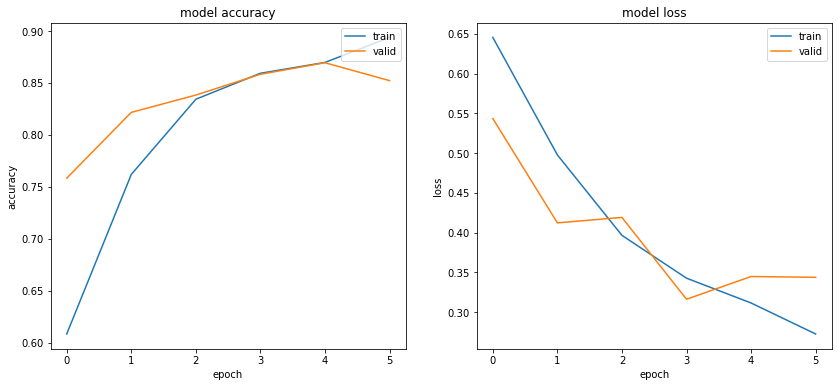

Consider rewriting this model with the Functional API.


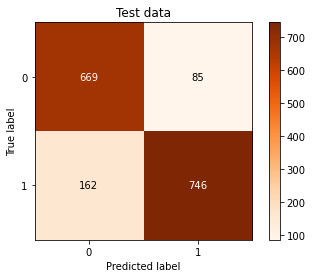

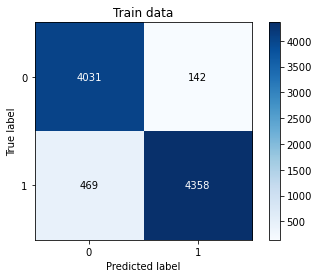

In [73]:
plot_history(history, model, 1)    

In [13]:
custom_embeding_matrix = np.array(custom_embed.get_weights())[0]
custom_embeding_matrix.shape

(3142, 300)

In [144]:
def rnn_classifier(embedding_matrix):
    earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
    embedding_dim = 300
    model = Sequential()
    model.add(layers.Embedding(input_dim=vocab_size,
                       output_dim=embedding_dim,
                       weights=[embedding_matrix],
                       input_length=maxlen,
                      trainable=False))
    model.add(Bidirectional(GRU(20, dropout=0.5, return_sequences=True)))
    model.add(Bidirectional(GRU(20, dropout=0.5)))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # model.summary()

    history = model.fit(X_train, y_train,
                    epochs=100,
                    verbose=True,
                    validation_split = 0.2,
                    batch_size=1000,
                    callbacks=[earlystop]
                    )


    loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
    print("Training Accuracy: {:.4f}".format(accuracy))
    loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
    print("Testing Accuracy:  {:.4f}".format(accuracy))
    plot_history(history, model, 1)

In [114]:
import gensim.downloader

for i in list(gensim.downloader.info()['models'].keys()):
    print(i)

fasttext-wiki-news-subwords-300
conceptnet-numberbatch-17-06-300
word2vec-ruscorpora-300
word2vec-google-news-300
glove-wiki-gigaword-50
glove-wiki-gigaword-100
glove-wiki-gigaword-200
glove-wiki-gigaword-300
glove-twitter-25
glove-twitter-50
glove-twitter-100
glove-twitter-200
__testing_word2vec-matrix-synopsis


In [115]:
import gensim.downloader as api


model = api.load("glove-wiki-gigaword-50")

In [116]:
cnt = 0
embedding_matrix_glove50 = np.zeros((vocab_size, 50))
for word, i in tokenizer.word_index.items():
    try:
        embedding_matrix_glove50[i] = model[word]
    except:
        cnt += 1
        print(word)
        
print(cnt)

Epoch 1/100
450/450 [==============================] - 22s 35ms/step - loss: 0.6686 - accuracy: 0.5624 - val_loss: 0.6193 - val_accuracy: 0.6633
Epoch 2/100
450/450 [==============================] - 14s 31ms/step - loss: 0.6312 - accuracy: 0.6456 - val_loss: 0.5994 - val_accuracy: 0.6650
Epoch 3/100
450/450 [==============================] - 13s 29ms/step - loss: 0.6075 - accuracy: 0.6742 - val_loss: 0.5371 - val_accuracy: 0.7122
Epoch 4/100
450/450 [==============================] - 13s 29ms/step - loss: 0.6029 - accuracy: 0.6725 - val_loss: 0.5414 - val_accuracy: 0.7239
Epoch 5/100
450/450 [==============================] - 13s 30ms/step - loss: 0.5894 - accuracy: 0.6821 - val_loss: 0.5260 - val_accuracy: 0.7417
Epoch 6/100
450/450 [==============================] - 13s 29ms/step - loss: 0.5799 - accuracy: 0.6858 - val_loss: 0.5090 - val_accuracy: 0.7433
Epoch 7/100
450/450 [==============================] - 14s 31ms/step - loss: 0.5740 - accuracy: 0.6919 - val_loss: 0.4944 - val_ac

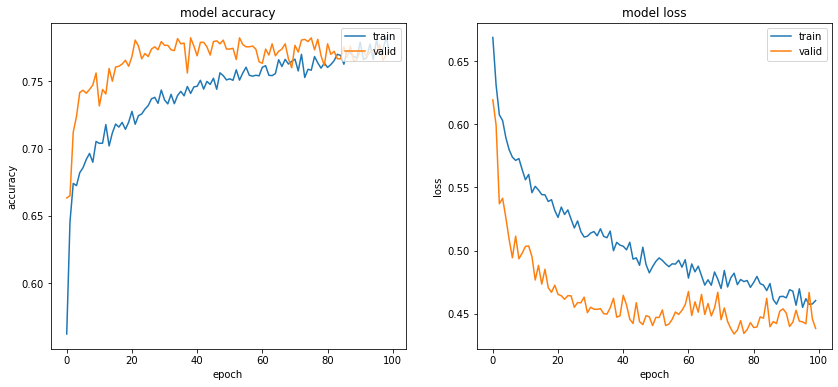

In [176]:
rnn_classifier(embedding_matrix_glove50)

In [57]:
# np.save("../custom_embeding_matrix.npy", custom_embeding_matrix)
# np.save("../embedding_matrix_word2vec.npy", embedding_matrix_word2vec)
# np.save("../embedding_matrix_fasttext.npy", embedding_matrix_fasttext)
# np.save("../embedding_matrix_glove.npy", embedding_matrix_glove)
# np.save("../custom_embedding_matrix_w2v.npy", embedding_matrix_w2v)
# np.save("../custom_embedding_matrix_ft.npy", embedding_matrix_ft)

# custom_embeding_matrix = np.load('../custom_embeding_matrix.npy')
# embedding_matrix_word2vec = np.load('../embedding_matrix_word2vec.npy')
# embedding_matrix_fasttext = np.load('../embedding_matrix_fasttext.npy')
# embedding_matrix_glove = np.load('../embedding_matrix_glove.npy')
# custom_embedding_matrix_w2v = np.load('../custom_embedding_matrix_w2v.npy')
# custom_embedding_matrix_ft = np.load('../custom_embedding_matrix_ft.npy')

In [29]:
embeddings_index_fasttext = dict()
f = open('crawl-300d-2M.vec')
cnt=0
for line in f:
    if(cnt<5):
        print(line)
    cnt += 1
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_fasttext[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index_fasttext))


1999995 300

, -0.0282 -0.0557 -0.0451 -0.0434 0.0712 -0.0855 -0.1085 -0.0561 -0.4523 -0.0202 0.0975 0.1047 0.1962 -0.0693 0.0213 -0.0235 0.1336 -0.0420 -0.0564 -0.0798 0.0424 -0.0409 -0.0536 -0.0252 0.0135 0.0064 0.1235 0.0461 0.0120 -0.0372 0.0650 0.0041 -0.1074 -0.0263 0.1133 -0.0029 0.0671 0.1065 0.0234 -0.0160 0.0070 0.4355 -0.0752 -0.4328 0.0457 0.0604 -0.0740 -0.0055 -0.0089 -0.2926 -0.0545 -0.1519 0.0990 -0.0193 -0.0050 0.0511 0.0404 0.1023 -0.0128 0.0488 -0.1567 -0.0759 -0.0190 0.1442 0.0047 -0.0186 0.0140 -0.0385 -0.0853 0.1572 0.1770 0.0084 -0.0250 -0.1145 -0.0663 -0.1244 -0.3977 -0.0124 -0.4586 -0.0220 0.5746 0.0218 -0.0754 0.0099 0.0397 -0.0154 0.0424 -0.0150 -0.0016 0.0305 0.0101 0.2266 0.1394 0.0189 0.0069 0.0394 0.0355 -0.0111 -0.0687 -0.0078 0.0224 0.0817 -0.1949 0.0001 0.4047 -0.0237 -0.0656 -0.0684 0.0233 0.0438 0.1203 -0.0276 0.0416 0.0114 -0.4529 0.1538 0.1323 -0.0186 -0.0914 -0.0312 0.1051 0.0212 0.0798 -0.0104 -0.0206 -0.0025 0.0043 -0.0378 0.2689 0.0747 -0.0418 

Loaded 1999996 word vectors.


In [30]:
cnt = 0
embedding_matrix_fasttext = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    try:
        embedding_matrix_fasttext[i] = embeddings_index_fasttext[word]
    except:
        
        cnt += 1
        print(word)
        
print(cnt)

benigni
solondz
soderbergh
huppert
sarandon
labute
cletis
noyce
tamb
almod
quido
garbus
swimfan
eddiemurphy
stico'
pouqu
ssimos
rifkin
harmonto
macdowell
stuporously
ahola
leighlays
serry
byler
imaginaci
rdida
dinero'
denirobrings
manqu
espet
ssima
pidamente
'hopkins
soderberghtends
assayas'homage
denis'bare
siegeland
niromanage
crudupa
rmino
ningu
gayton's
scripttelegraphs
bledelseem
pimental
ladr
orqu
schweiger
drumlineis
nch's
amakes
andersonuses
anhilarious
taymorutilizes
villeneuveseems
herzog'sleast
sinksinto
filmaddresses
providesnail
itfinds
moore'snoisy
gaicomes
peterjackson
witherspoon'scharisma
fessendenis
broomfielduncovers
ltimos
asuperbly
hawn's
ricci'sbest
howardso
sadeis
magimelare
gainsbourg'sunfamiliar
bouncesall
sdirected
putsthe
talanc
oesn't
cityreminds
jackiechan's
chaiken'stalent
jonescalls
kissinger'sany
majidimakes
quillsdid
grant'sbumbling
cockettesprovides
phillipnoyce
renodelivers
haynes'homage
tte's
awonderfully
hanekesteers
shyamalanturns
evanshad
reachesw

Epoch 1/100
8/8 [==============================] - 11s 619ms/step - loss: 0.6936 - accuracy: 0.5014 - val_loss: 0.6928 - val_accuracy: 0.5217
Epoch 2/100
8/8 [==============================] - 4s 457ms/step - loss: 0.6920 - accuracy: 0.5151 - val_loss: 0.6910 - val_accuracy: 0.5872
Epoch 3/100
8/8 [==============================] - 4s 454ms/step - loss: 0.6885 - accuracy: 0.5375 - val_loss: 0.6827 - val_accuracy: 0.5833
Epoch 4/100
8/8 [==============================] - 4s 464ms/step - loss: 0.6856 - accuracy: 0.5586 - val_loss: 0.6758 - val_accuracy: 0.6433
Epoch 5/100
8/8 [==============================] - 4s 455ms/step - loss: 0.6779 - accuracy: 0.5789 - val_loss: 0.6643 - val_accuracy: 0.6539
Epoch 6/100
8/8 [==============================] - 4s 458ms/step - loss: 0.6678 - accuracy: 0.6058 - val_loss: 0.6521 - val_accuracy: 0.6900
Epoch 7/100
8/8 [==============================] - 4s 455ms/step - loss: 0.6551 - accuracy: 0.6411 - val_loss: 0.6335 - val_accuracy: 0.7072
Epoch 8/100


Epoch 59/100
8/8 [==============================] - 4s 478ms/step - loss: 0.4510 - accuracy: 0.8040 - val_loss: 0.4212 - val_accuracy: 0.8167
Epoch 60/100
8/8 [==============================] - 4s 479ms/step - loss: 0.4580 - accuracy: 0.8012 - val_loss: 0.4169 - val_accuracy: 0.7961
Epoch 61/100
8/8 [==============================] - 4s 464ms/step - loss: 0.4543 - accuracy: 0.8021 - val_loss: 0.4150 - val_accuracy: 0.8128
Epoch 62/100
8/8 [==============================] - 4s 468ms/step - loss: 0.4505 - accuracy: 0.8056 - val_loss: 0.4122 - val_accuracy: 0.8128
Epoch 63/100
8/8 [==============================] - 4s 466ms/step - loss: 0.4444 - accuracy: 0.8074 - val_loss: 0.4148 - val_accuracy: 0.8122
Epoch 64/100
8/8 [==============================] - 4s 465ms/step - loss: 0.4527 - accuracy: 0.8051 - val_loss: 0.4176 - val_accuracy: 0.8161
Epoch 65/100
8/8 [==============================] - 4s 475ms/step - loss: 0.4424 - accuracy: 0.8079 - val_loss: 0.4142 - val_accuracy: 0.7944
Epoch 

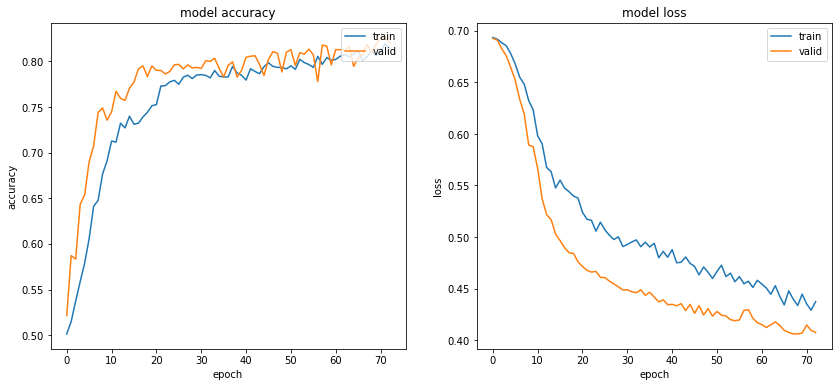

Consider rewriting this model with the Functional API.


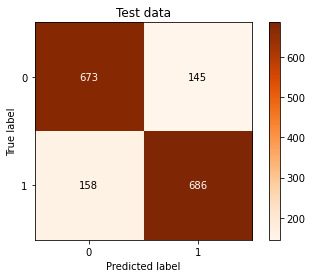

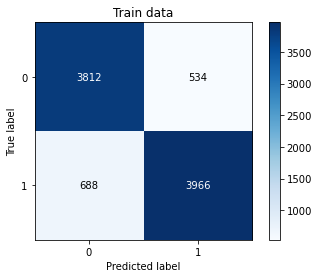

In [145]:
rnn_classifier(embedding_matrix_fasttext)

In [155]:
Test_Accuracy_fasttext_embed = 0.8177

In [31]:
from gensim import models

embeddings_index_word2vec = dict()
word2vec_vector = models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [32]:
cnt = 0
embedding_matrix_word2vec = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    try:
        embedding_matrix_word2vec[i] = word2vec_vector[word]
    except:
        cnt += 1
        print(word)
        
print(cnt)

a
and
of
to
'
niro
spielberg
90
2002
seagal
benigni
solondz
10
pinocchio
sandler
soderbergh
'the
51
sade
20
huppert
kissinger
ecks
humour
mckay
farrelly
affleck
frida
polanski
tosca
pacino
sarandon
grey
kapur
scorsese
80
labute
paradiso
jagger
broomfield
ramsay
20th
cletis
haynes
noyce
tamb
tambi
21
ncia
arare
almod
quido
cula
garbus
fantasti
swimfan
eddiemurphy
carvey
'art
stico'
pouqu
ssimos
rifkin
javier
harmonto
macdowell
joff
arather
stuporously
ahola
itcomes
abrahams
leighlays
serry
stima
besson
palma
seinfeld
byler
imaginaci
rdida
dinero'
schaeffer
denirobrings
epis
manqu
espet
ssima
herzog
janey
thanan
pidamente
istrying
70s
timo
'hopkins
soderberghtends
versi
assayas'homage
denis'bare
siegeland
niromanage
crudupa
calibre
rmino
ningu
enviar
gayton's
scripttelegraphs
bledelseem
pimental
witherspoon
ladr
orqu
schweiger
drumlineis
jir
nch's
amakes
andr
andersonuses
anhilarious
taymorutilizes
villeneuveseems
herzog'sleast
sinksinto
filmaddresses
providesnail
itfinds
moore'snoisy
ga

Epoch 1/100
450/450 [==============================] - 24s 39ms/step - loss: 0.6318 - accuracy: 0.6169 - val_loss: 0.5306 - val_accuracy: 0.7506
Epoch 2/100
450/450 [==============================] - 16s 36ms/step - loss: 0.5636 - accuracy: 0.6939 - val_loss: 0.4687 - val_accuracy: 0.7650
Epoch 3/100
450/450 [==============================] - 16s 35ms/step - loss: 0.5249 - accuracy: 0.6949 - val_loss: 0.4733 - val_accuracy: 0.7783
Epoch 4/100
450/450 [==============================] - 16s 35ms/step - loss: 0.4996 - accuracy: 0.7371 - val_loss: 0.4324 - val_accuracy: 0.7994
Epoch 5/100
450/450 [==============================] - 16s 36ms/step - loss: 0.4941 - accuracy: 0.7519 - val_loss: 0.4449 - val_accuracy: 0.7972
Epoch 6/100
450/450 [==============================] - 16s 35ms/step - loss: 0.4808 - accuracy: 0.7582 - val_loss: 0.4434 - val_accuracy: 0.7567
Epoch 7/100
450/450 [==============================] - 15s 34ms/step - loss: 0.4748 - accuracy: 0.7601 - val_loss: 0.4352 - val_ac

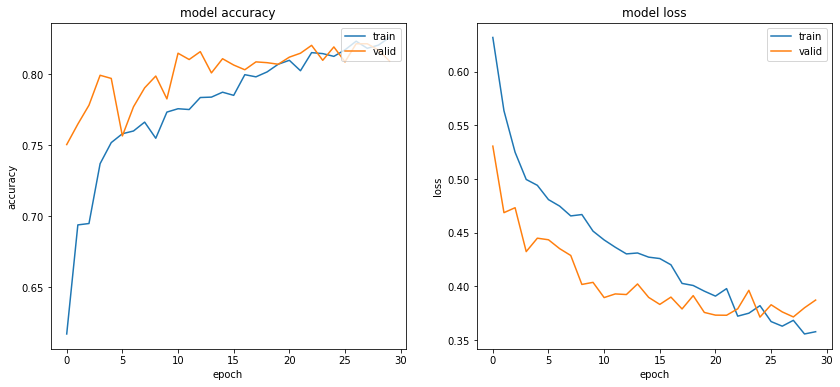

In [189]:
# binary classifier - word2vec embedding
rnn_classifier(embedding_matrix_word2vec)

Epoch 1/100
8/8 [==============================] - 12s 631ms/step - loss: 0.6927 - accuracy: 0.5096 - val_loss: 0.6912 - val_accuracy: 0.6194
Epoch 2/100
8/8 [==============================] - 4s 458ms/step - loss: 0.6910 - accuracy: 0.5206 - val_loss: 0.6885 - val_accuracy: 0.6122
Epoch 3/100
8/8 [==============================] - 4s 459ms/step - loss: 0.6881 - accuracy: 0.5371 - val_loss: 0.6842 - val_accuracy: 0.6439
Epoch 4/100
8/8 [==============================] - 4s 454ms/step - loss: 0.6820 - accuracy: 0.5657 - val_loss: 0.6764 - val_accuracy: 0.6500
Epoch 5/100
8/8 [==============================] - 4s 457ms/step - loss: 0.6738 - accuracy: 0.5607 - val_loss: 0.6625 - val_accuracy: 0.6611
Epoch 6/100
8/8 [==============================] - 4s 460ms/step - loss: 0.6571 - accuracy: 0.6122 - val_loss: 0.6387 - val_accuracy: 0.6750
Epoch 7/100
8/8 [==============================] - 4s 455ms/step - loss: 0.6360 - accuracy: 0.6350 - val_loss: 0.6041 - val_accuracy: 0.6961
Epoch 8/100


Epoch 59/100
8/8 [==============================] - 4s 444ms/step - loss: 0.4699 - accuracy: 0.7650 - val_loss: 0.4234 - val_accuracy: 0.7844
Epoch 60/100
8/8 [==============================] - 4s 468ms/step - loss: 0.4571 - accuracy: 0.7713 - val_loss: 0.4213 - val_accuracy: 0.7983
Epoch 61/100
8/8 [==============================] - 4s 448ms/step - loss: 0.4648 - accuracy: 0.7721 - val_loss: 0.4193 - val_accuracy: 0.7978
Epoch 62/100
8/8 [==============================] - 4s 443ms/step - loss: 0.4643 - accuracy: 0.7694 - val_loss: 0.4198 - val_accuracy: 0.7983
Epoch 63/100
8/8 [==============================] - 4s 452ms/step - loss: 0.4564 - accuracy: 0.7690 - val_loss: 0.4152 - val_accuracy: 0.8000
Epoch 64/100
8/8 [==============================] - 4s 444ms/step - loss: 0.4513 - accuracy: 0.7724 - val_loss: 0.4164 - val_accuracy: 0.7928
Epoch 65/100
8/8 [==============================] - 4s 452ms/step - loss: 0.4537 - accuracy: 0.7743 - val_loss: 0.4196 - val_accuracy: 0.7806
Epoch 

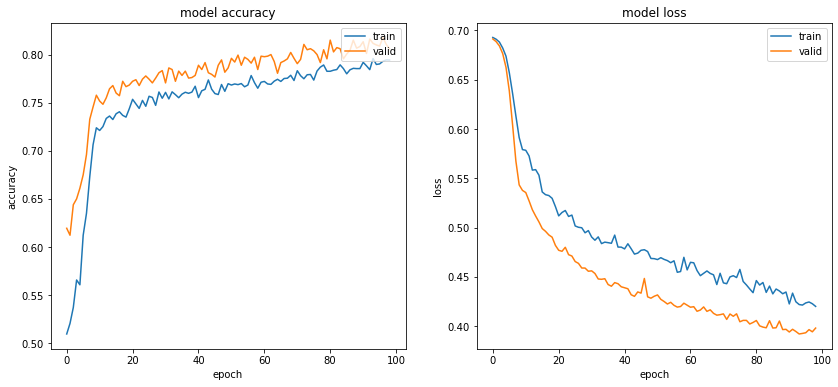

Consider rewriting this model with the Functional API.


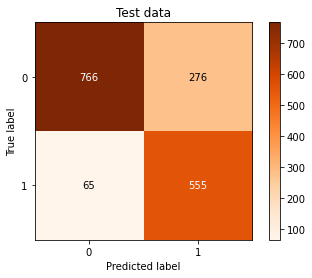

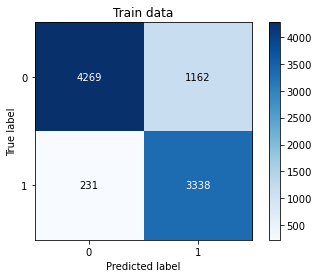

In [146]:
rnn_classifier(embedding_matrix_word2vec)

In [154]:
Testing_Accuracy_word2vec_embed = 0.7948

In [33]:
# load the whole embedding into memory
embeddings_index_glove = dict()
f = open('glove.840B.300d.txt','r', encoding="utf-8", errors = 'ignore')
cnt=0
for line in f:
    if(cnt<5):
        print(line)
    cnt += 1
    values = line.split()
    word = ''.join(values[:-300])
    coefs = np.asarray(values[-300:], dtype='float32')
    embeddings_index_glove[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index_glove))


, -0.082752 0.67204 -0.14987 -0.064983 0.056491 0.40228 0.0027747 -0.3311 -0.30691 2.0817 0.031819 0.013643 0.30265 0.0071297 -0.5819 -0.2774 -0.062254 1.1451 -0.24232 0.1235 -0.12243 0.33152 -0.006162 -0.30541 -0.13057 -0.054601 0.037083 -0.070552 0.5893 -0.30385 0.2898 -0.14653 -0.27052 0.37161 0.32031 -0.29125 0.0052483 -0.13212 -0.052736 0.087349 -0.26668 -0.16897 0.015162 -0.0083746 -0.14871 0.23413 -0.20719 -0.091386 0.40075 -0.17223 0.18145 0.37586 -0.28682 0.37289 -0.16185 0.18008 0.3032 -0.13216 0.18352 0.095759 0.094916 0.008289 0.11761 0.34046 0.03677 -0.29077 0.058303 -0.027814 0.082941 0.1862 -0.031494 0.27985 -0.074412 -0.13762 -0.21866 0.18138 0.040855 -0.113 0.24107 0.3657 -0.27525 -0.05684 0.34872 0.011884 0.14517 -0.71395 0.48497 0.14807 0.62287 0.20599 0.58379 -0.13438 0.40207 0.18311 0.28021 -0.42349 -0.25626 0.17715 -0.54095 0.16596 -0.036058 0.08499 -0.64989 0.075549 -0.28831 0.40626 -0.2802 0.094062 0.32406 0.28437 -0.26341 0.11553 0.071918 -0.47215 -0.18366 -0.3

Loaded 2195892 word vectors.


In [34]:
cnt = 0
embedding_matrix_glove = np.zeros((vocab_size, 300))
for word, i in tokenizer.word_index.items():
    try:
        embedding_matrix_glove[i] = embeddings_index_glove[word]
    except:
        cnt += 1
        print(word)
        
print(cnt)

there's
isn't
he's
won't
they're
she's
we're
haven't
solondz
'the
labute
cletis
almod
quido
garbus
eddiemurphy
'art
stico'
pouqu
ssimos
harmonto
joff
arather
stuporously
ahola
leighlays
serry
byler
imaginaci
rdida
dinero'
denirobrings
manqu
espet
ssima
thanan
pidamente
istrying
'hopkins
soderberghtends
assayas'homage
denis'bare
siegeland
niromanage
crudupa
rmino
ningu
gayton's
scripttelegraphs
bledelseem
pimental
ladr
orqu
schweiger
drumlineis
nch's
amakes
andersonuses
anhilarious
taymorutilizes
villeneuveseems
herzog'sleast
sinksinto
filmaddresses
providesnail
itfinds
moore'snoisy
gaicomes
peterjackson
witherspoon'scharisma
sorprender
fessendenis
broomfielduncovers
asuperbly
hawn's
ricci'sbest
howardso
sadeis
magimelare
gainsbourg'sunfamiliar
bouncesall
sdirected
putsthe
garc
talanc
oesn't
cityreminds
jackiechan's
chaiken'stalent
jonescalls
kissinger'sany
majidimakes
quillsdid
grant'sbumbling
cockettesprovides
phillipnoyce
renodelivers
haynes'homage
tte's
awonderfully
hanekesteers
shy

In [192]:
embedding_matrix_glove.shape

(3142, 300)

Epoch 1/100
450/450 [==============================] - 26s 39ms/step - loss: 0.6166 - accuracy: 0.6399 - val_loss: 0.5181 - val_accuracy: 0.7322
Epoch 2/100
450/450 [==============================] - 14s 32ms/step - loss: 0.5277 - accuracy: 0.7369 - val_loss: 0.4470 - val_accuracy: 0.7944
Epoch 3/100
450/450 [==============================] - 15s 34ms/step - loss: 0.4970 - accuracy: 0.7449 - val_loss: 0.4276 - val_accuracy: 0.7967
Epoch 4/100
450/450 [==============================] - 15s 34ms/step - loss: 0.4863 - accuracy: 0.7536 - val_loss: 0.4333 - val_accuracy: 0.7778
Epoch 5/100
450/450 [==============================] - 16s 35ms/step - loss: 0.4793 - accuracy: 0.7586 - val_loss: 0.4183 - val_accuracy: 0.7872
Epoch 6/100
450/450 [==============================] - 16s 36ms/step - loss: 0.4630 - accuracy: 0.7710 - val_loss: 0.4115 - val_accuracy: 0.8017
Epoch 7/100
450/450 [==============================] - 16s 36ms/step - loss: 0.4539 - accuracy: 0.7718 - val_loss: 0.4012 - val_ac

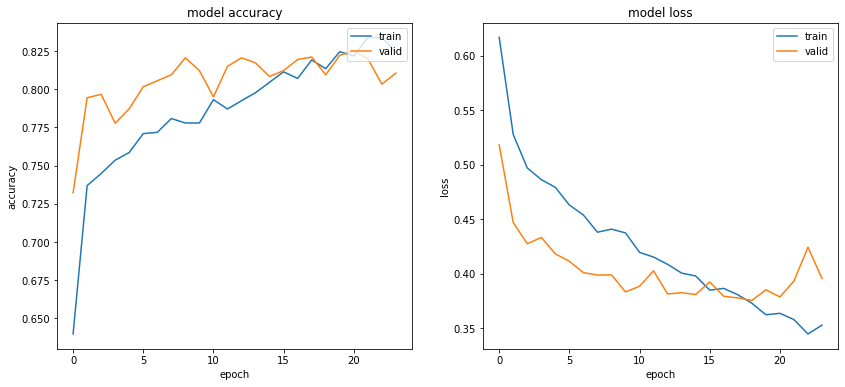

In [193]:
# binary classifier - word2vec embedding
rnn_classifier(embedding_matrix_glove)

Epoch 1/100
8/8 [==============================] - 12s 597ms/step - loss: 0.6954 - accuracy: 0.5071 - val_loss: 0.6923 - val_accuracy: 0.5389
Epoch 2/100
8/8 [==============================] - 4s 448ms/step - loss: 0.6916 - accuracy: 0.5279 - val_loss: 0.6900 - val_accuracy: 0.5883
Epoch 3/100
8/8 [==============================] - 4s 446ms/step - loss: 0.6886 - accuracy: 0.5443 - val_loss: 0.6839 - val_accuracy: 0.6178
Epoch 4/100
8/8 [==============================] - 4s 442ms/step - loss: 0.6853 - accuracy: 0.5528 - val_loss: 0.6775 - val_accuracy: 0.6406
Epoch 5/100
8/8 [==============================] - 4s 442ms/step - loss: 0.6800 - accuracy: 0.5744 - val_loss: 0.6691 - val_accuracy: 0.6583
Epoch 6/100
8/8 [==============================] - 4s 466ms/step - loss: 0.6759 - accuracy: 0.5950 - val_loss: 0.6609 - val_accuracy: 0.6872
Epoch 7/100
8/8 [==============================] - 4s 443ms/step - loss: 0.6636 - accuracy: 0.6268 - val_loss: 0.6444 - val_accuracy: 0.6978
Epoch 8/100


Epoch 59/100
8/8 [==============================] - 4s 442ms/step - loss: 0.4889 - accuracy: 0.7921 - val_loss: 0.4917 - val_accuracy: 0.7800
Epoch 60/100
8/8 [==============================] - 4s 450ms/step - loss: 0.4956 - accuracy: 0.7925 - val_loss: 0.4986 - val_accuracy: 0.7739
Epoch 61/100
8/8 [==============================] - 4s 439ms/step - loss: 0.4940 - accuracy: 0.7932 - val_loss: 0.4870 - val_accuracy: 0.7906
Epoch 62/100
8/8 [==============================] - 4s 452ms/step - loss: 0.4842 - accuracy: 0.7969 - val_loss: 0.4802 - val_accuracy: 0.8006
Epoch 63/100
8/8 [==============================] - 4s 440ms/step - loss: 0.4948 - accuracy: 0.7912 - val_loss: 0.4928 - val_accuracy: 0.7778
Epoch 64/100
8/8 [==============================] - 4s 451ms/step - loss: 0.4843 - accuracy: 0.8032 - val_loss: 0.5039 - val_accuracy: 0.7661
Epoch 65/100
8/8 [==============================] - 4s 449ms/step - loss: 0.4912 - accuracy: 0.7899 - val_loss: 0.4859 - val_accuracy: 0.7906
Epoch 

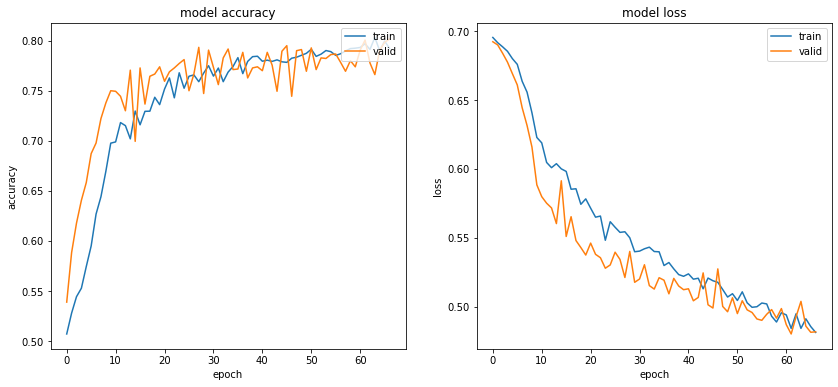

Consider rewriting this model with the Functional API.


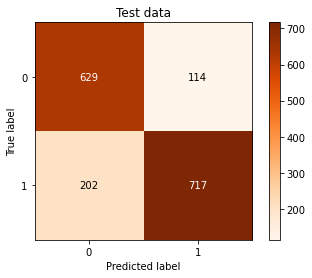

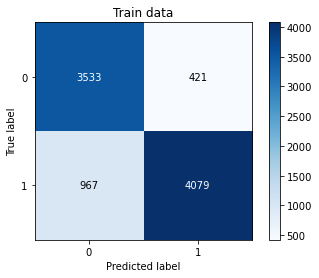

In [147]:
rnn_classifier(embedding_matrix_glove)

In [153]:
Testing_Accuracy_glove_embed = 0.8099

In [27]:
import string
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

from gensim.models import *

import tensorflow as tf
from tensorflow.keras.utils import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow.keras.backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()


In [100]:
def DME(list_emb, maxlen):
    
    inputs = []
    output = []
    proj_dim = 200
    num_emb = len(list_emb)
    
    for embedding in list_emb:
        inp = Input(shape=(maxlen,))
        emb = Embedding(vocab_size, 300, weights=[embedding], trainable=False)(inp)
        dense = Dense(proj_dim, activation=None)(emb)
        dense = Reshape((-1,proj_dim,1))(dense)
        inputs.append(inp)
        output.append(dense)
        
    concat = Concatenate(axis=-1)(output)
    
    project = Model(inputs, concat)

    inp = Input(shape=(maxlen, proj_dim, num_emb))
    x = Reshape((maxlen, proj_dim*num_emb))(inp)
    x = Dense(1, activation='sigmoid')(x)
    x = Reshape((maxlen, 1, 1))(x)
    x = multiply([inp, x])
    out = Lambda(lambda t: K.sum(t, axis=-1))(x)
    dme = Model(inp, out)

    x = dme(project.output)
    x = Bidirectional(GRU(20, dropout=0.5, return_sequences=True))(x)
    x = Bidirectional(GRU(20, dropout=0.5))(x)
    x = Dense(5, activation='relu')(x)
    x = Dropout(0.5)(x)
    # x.add()
    out = Dense(1, activation='sigmoid')(x)

    dme_model = Model(project.input, out)
    dme_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return dme_model
    

In [101]:
y_train, X_train = shuffle(y_train, X_train, random_state=1234)
y_test, X_test = shuffle(y_test, X_test, random_state=1234)

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
list_embed = [ custom_embeding_matrix, embedding_matrix_word2vec, 
                         embedding_matrix_fasttext, embedding_matrix_glove ]
len_list_embed = len(list_embed)

dme_model = DME(list_embed, maxlen=maxlen)
history = dme_model.fit([X_train]*len_list_embed,
                        y_train, 
                        batch_size=1000, 
                        epochs=200, 
                        verbose=1, 
                        validation_split=0.2,
                        callbacks=[earlystop]
                       )

KerasTensor(type_spec=TensorSpec(shape=(None, 100, 200), dtype=tf.float32, name=None), name='model_71/lambda_24/Sum:0', description="created by layer 'model_71'")
Epoch 1/200
8/8 [==============================] - 18s 1s/step - loss: 0.6802 - accuracy: 0.5567 - val_loss: 0.6321 - val_accuracy: 0.7172
Epoch 2/200
8/8 [==============================] - 10s 1s/step - loss: 0.6322 - accuracy: 0.6319 - val_loss: 0.5741 - val_accuracy: 0.7689
Epoch 3/200
8/8 [==============================] - 10s 1s/step - loss: 0.5884 - accuracy: 0.6844 - val_loss: 0.5013 - val_accuracy: 0.8133
Epoch 4/200
8/8 [==============================] - 10s 1s/step - loss: 0.5303 - accuracy: 0.7299 - val_loss: 0.4125 - val_accuracy: 0.8733
Epoch 5/200
8/8 [==============================] - 10s 1s/step - loss: 0.4714 - accuracy: 0.7708 - val_loss: 0.3338 - val_accuracy: 0.9133
Epoch 6/200
8/8 [==============================] - 10s 1s/step - loss: 0.4229 - accuracy: 0.7865 - val_loss: 0.2792 - val_accuracy: 0.9206
Epo

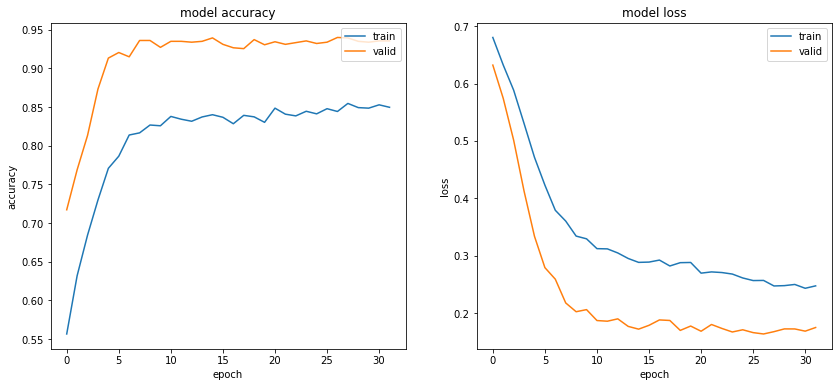

Training Accuracy: 0.9644
Test Accuracy:  0.8670


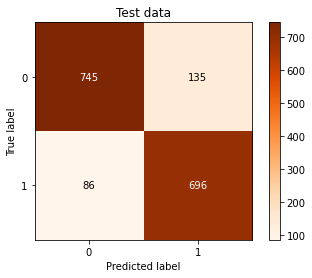

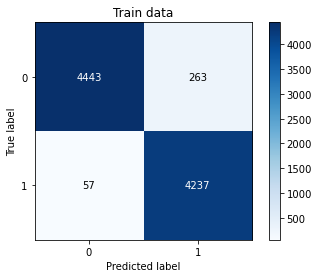

In [102]:
plot_history(history, dme_model, len_list_embed)
loss, accuracy = dme_model.evaluate([X_train]*len_list_embed, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = dme_model.evaluate([X_test]*len_list_embed, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))

In [103]:
list_embed = [ custom_embedding_matrix_ft, custom_embeding_matrix, embedding_matrix_word2vec, 
                         custom_embedding_matrix_w2v, embedding_matrix_fasttext, embedding_matrix_glove ]
len_list_embed = len(list_embed)

dme_model = DME(list_embed, maxlen=maxlen)
history = dme_model.fit([X_train]*len_list_embed,
                        y_train, 
                        batch_size=1000, 
                        epochs=200, 
                        verbose=1, 
                        validation_split=0.2,
                        callbacks=[earlystop]
                       )

KerasTensor(type_spec=TensorSpec(shape=(None, 100, 200), dtype=tf.float32, name=None), name='model_74/lambda_25/Sum:0', description="created by layer 'model_74'")
Epoch 1/200
8/8 [==============================] - 22s 2s/step - loss: 0.6831 - accuracy: 0.5425 - val_loss: 0.6364 - val_accuracy: 0.6583
Epoch 2/200
8/8 [==============================] - 14s 2s/step - loss: 0.6352 - accuracy: 0.6044 - val_loss: 0.5650 - val_accuracy: 0.7428
Epoch 3/200
8/8 [==============================] - 14s 2s/step - loss: 0.5810 - accuracy: 0.6575 - val_loss: 0.5020 - val_accuracy: 0.7978
Epoch 4/200
8/8 [==============================] - 13s 2s/step - loss: 0.5463 - accuracy: 0.7043 - val_loss: 0.4420 - val_accuracy: 0.8250
Epoch 5/200
8/8 [==============================] - 14s 2s/step - loss: 0.5051 - accuracy: 0.7276 - val_loss: 0.3847 - val_accuracy: 0.8589
Epoch 6/200
8/8 [==============================] - 14s 2s/step - loss: 0.4513 - accuracy: 0.7601 - val_loss: 0.3182 - val_accuracy: 0.8939
Epo

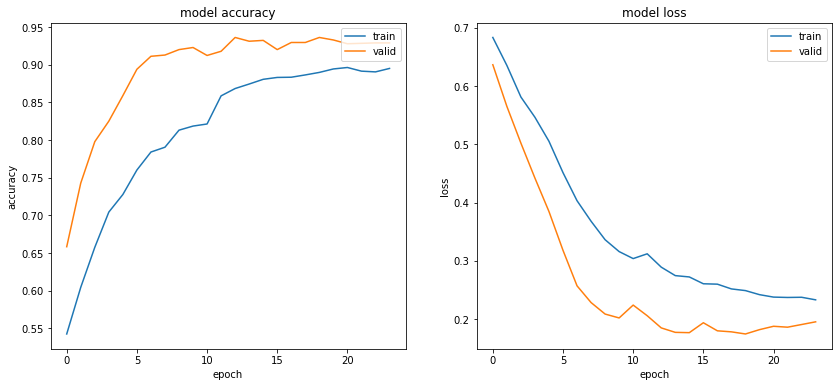

Training Accuracy: 0.9567
Test Accuracy:  0.8785


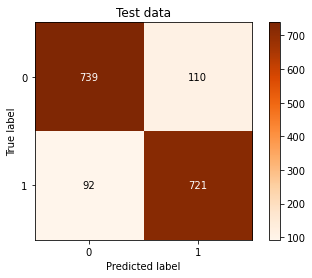

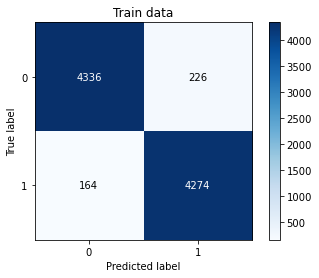

In [104]:
plot_history(history, dme_model, len_list_embed)
loss, accuracy = dme_model.evaluate([X_train]*len_list_embed, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = dme_model.evaluate([X_test]*len_list_embed, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))

In [127]:
list_embed = [ embedding_matrix_word2vec, 
               embedding_matrix_fasttext, embedding_matrix_glove ]
len_list_embed = len(list_embed)
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

dme_model = DME(list_embed, maxlen=maxlen)
history = dme_model.fit([X_train]*len_list_embed,
                        y_train, 
                        batch_size=1000, 
                        epochs=200, 
                        verbose=1, 
                        validation_split=0.2,
                        callbacks=[earlystop]
                       )

KerasTensor(type_spec=TensorSpec(shape=(None, 100, 200), dtype=tf.float32, name=None), name='model_104/lambda_35/Sum:0', description="created by layer 'model_104'")
Epoch 1/200
8/8 [==============================] - 16s 1s/step - loss: 0.6909 - accuracy: 0.5132 - val_loss: 0.6831 - val_accuracy: 0.5361
Epoch 2/200
8/8 [==============================] - 8s 1s/step - loss: 0.6738 - accuracy: 0.5600 - val_loss: 0.6331 - val_accuracy: 0.6728
Epoch 3/200
8/8 [==============================] - 9s 1s/step - loss: 0.6472 - accuracy: 0.5990 - val_loss: 0.6060 - val_accuracy: 0.7050
Epoch 4/200
8/8 [==============================] - 8s 1s/step - loss: 0.6127 - accuracy: 0.6485 - val_loss: 0.5592 - val_accuracy: 0.7172
Epoch 5/200
8/8 [==============================] - 8s 1s/step - loss: 0.5879 - accuracy: 0.6571 - val_loss: 0.5331 - val_accuracy: 0.7372
Epoch 6/200
8/8 [==============================] - 8s 1s/step - loss: 0.5601 - accuracy: 0.6754 - val_loss: 0.5077 - val_accuracy: 0.7594
Epoch 

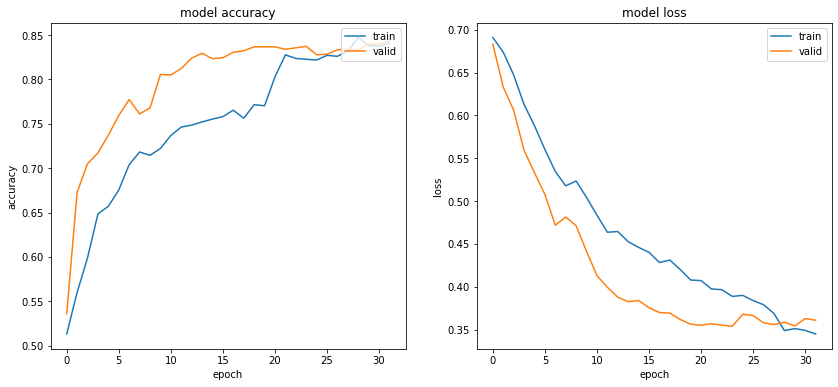

Training Accuracy: 0.8922
Test Accuracy:  0.8381


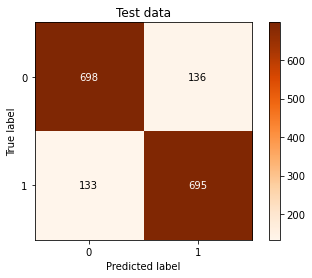

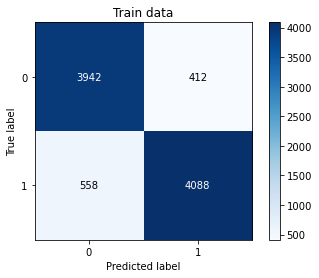

In [128]:
plot_history(history, dme_model, len_list_embed)
loss, accuracy = dme_model.evaluate([X_train]*len_list_embed, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = dme_model.evaluate([X_test]*len_list_embed, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))

In [133]:
list_embed = [ custom_embedding_matrix_ft, custom_embeding_matrix,
                         custom_embedding_matrix_w2v]
len_list_embed = len(list_embed)

dme_model = DME(list_embed, maxlen=maxlen)
history = dme_model.fit([X_train]*len_list_embed,
                        y_train, 
                        batch_size=1000, 
                        epochs=200, 
                        verbose=1, 
                        validation_split=0.2,
                        callbacks=[earlystop]
                       )

KerasTensor(type_spec=TensorSpec(shape=(None, 100, 200), dtype=tf.float32, name=None), name='model_113/lambda_38/Sum:0', description="created by layer 'model_113'")
Epoch 1/200
8/8 [==============================] - 15s 1s/step - loss: 0.6778 - accuracy: 0.5600 - val_loss: 0.6317 - val_accuracy: 0.6883
Epoch 2/200
8/8 [==============================] - 9s 1s/step - loss: 0.6264 - accuracy: 0.6356 - val_loss: 0.5625 - val_accuracy: 0.7578
Epoch 3/200
8/8 [==============================] - 9s 1s/step - loss: 0.5708 - accuracy: 0.7022 - val_loss: 0.4881 - val_accuracy: 0.7928
Epoch 4/200
8/8 [==============================] - 9s 1s/step - loss: 0.5303 - accuracy: 0.7326 - val_loss: 0.4285 - val_accuracy: 0.8211
Epoch 5/200
8/8 [==============================] - 9s 1s/step - loss: 0.4819 - accuracy: 0.7721 - val_loss: 0.3745 - val_accuracy: 0.8467
Epoch 6/200
8/8 [==============================] - 9s 1s/step - loss: 0.4457 - accuracy: 0.8006 - val_loss: 0.3119 - val_accuracy: 0.8761
Epoch 

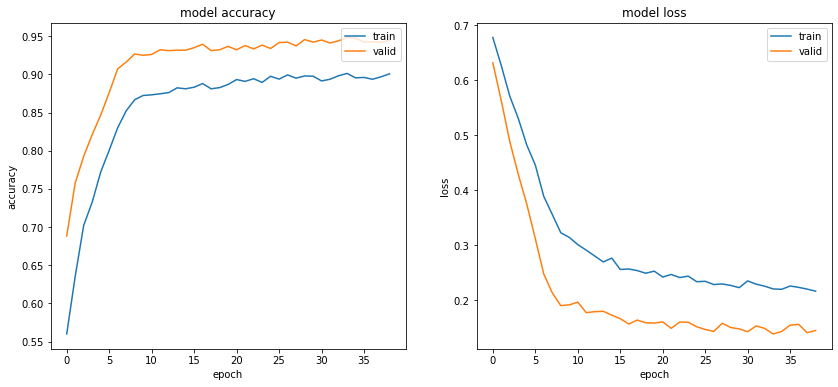

Training Accuracy: 0.9567
Test Accuracy:  0.8755


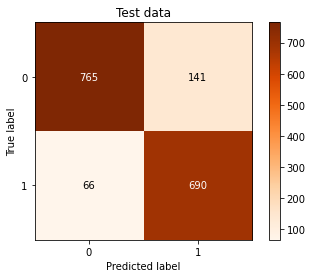

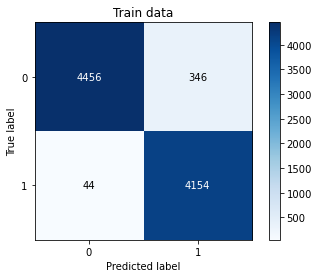

In [134]:
plot_history(history, dme_model, len_list_embed)
loss, accuracy = dme_model.evaluate([X_train]*len_list_embed, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = dme_model.evaluate([X_test]*len_list_embed, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))

In [107]:
def DME_unweighted(list_emb, maxlen):
    
    inputs = []
    output = []
    proj_dim = 200
    num_emb = len(list_emb)
    
    for embedding in list_emb:
        inp = Input(shape=(maxlen,))
        emb = Embedding(vocab_size, 300, weights=[embedding], trainable=False)(inp)
        dense = Dense(proj_dim, activation=None)(emb)
        dense = Reshape((-1,proj_dim,1))(dense)
        inputs.append(inp)
        output.append(dense)
        
    concat = Concatenate(axis=-1)(output)
    
    project = Model(inputs, concat)

    inp = Input(shape=(maxlen, proj_dim, num_emb))
#     x = Reshape((maxlen, proj_dim*num_emb))(inp)
#     x = Dense(1, activation='sigmoid')(x)
#     x = Reshape((maxlen, 1, 1))(x)
#     x = multiply([inp, x])
    out = Lambda(lambda t: K.sum(t, axis=-1))(inp)
    dme = Model(inp, out)

    x = dme(project.output)
    print(x)
    x = Bidirectional(GRU(20, dropout=0.5, return_sequences=True))(x)
    x = Bidirectional(GRU(20, dropout=0.5))(x)
    x = Dense(5, activation='relu')(x)
    x = Dropout(0.5)(x)
    # x.add()
    out = Dense(1, activation='sigmoid')(x)

    dme_model = Model(project.input, out)
    dme_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return dme_model
    

In [108]:
y_train, X_train = shuffle(y_train, X_train, random_state=1234)
y_test, X_test = shuffle(y_test, X_test, random_state=1234)

earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

list_embed = [ custom_embeding_matrix, embedding_matrix_word2vec, 
                         embedding_matrix_fasttext, embedding_matrix_glove ]
len_list_embed = len(list_embed)

dme_model = DME_unweighted(list_embed, maxlen=maxlen)
history = dme_model.fit([X_train]*len_list_embed,
                        y_train, 
                        batch_size=1000, 
                        epochs=200, 
                        verbose=1, 
                        validation_split=0.2,
                        callbacks=[earlystop]
                       )

KerasTensor(type_spec=TensorSpec(shape=(None, 100, 200), dtype=tf.float32, name=None), name='model_80/lambda_27/Sum:0', description="created by layer 'model_80'")
Epoch 1/200
8/8 [==============================] - 15s 1s/step - loss: 0.6926 - accuracy: 0.5069 - val_loss: 0.6734 - val_accuracy: 0.4950
Epoch 2/200
8/8 [==============================] - 7s 842ms/step - loss: 0.6639 - accuracy: 0.5612 - val_loss: 0.5828 - val_accuracy: 0.7572
Epoch 3/200
8/8 [==============================] - 7s 832ms/step - loss: 0.6219 - accuracy: 0.6043 - val_loss: 0.5120 - val_accuracy: 0.8328
Epoch 4/200
8/8 [==============================] - 7s 833ms/step - loss: 0.5591 - accuracy: 0.6319 - val_loss: 0.3936 - val_accuracy: 0.8589
Epoch 5/200
8/8 [==============================] - 7s 861ms/step - loss: 0.4780 - accuracy: 0.7379 - val_loss: 0.3116 - val_accuracy: 0.9122
Epoch 6/200
8/8 [==============================] - 7s 834ms/step - loss: 0.4282 - accuracy: 0.7826 - val_loss: 0.2580 - val_accuracy: 

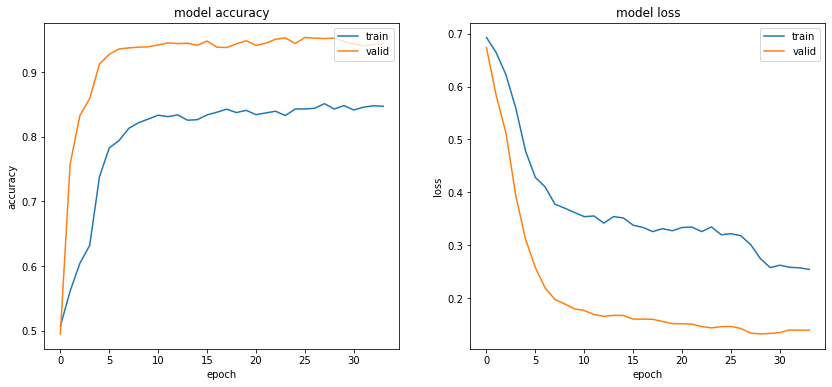

Training Accuracy: 0.9644
Test Accuracy:  0.8706


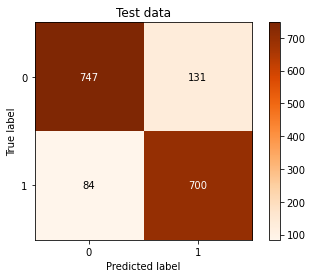

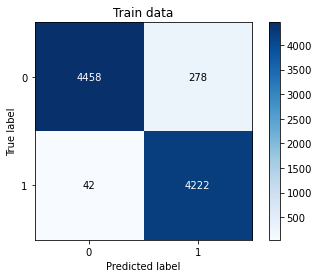

In [109]:
plot_history(history, dme_model, len_list_embed)
loss, accuracy = dme_model.evaluate([X_train]*len_list_embed, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = dme_model.evaluate([X_test]*len_list_embed, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))

In [110]:
list_embed = [ custom_embedding_matrix_ft, custom_embeding_matrix, embedding_matrix_word2vec, 
                         custom_embedding_matrix_w2v, embedding_matrix_fasttext, embedding_matrix_glove ]
len_list_embed = len(list_embed)

dme_model = DME(list_embed, maxlen=maxlen)
history = dme_model.fit([X_train]*len_list_embed,
                        y_train, 
                        batch_size=1000, 
                        epochs=200, 
                        verbose=1, 
                        validation_split=0.2,
                        callbacks=[earlystop]
                       )

KerasTensor(type_spec=TensorSpec(shape=(None, 100, 200), dtype=tf.float32, name=None), name='model_83/lambda_28/Sum:0', description="created by layer 'model_83'")
Epoch 1/200
8/8 [==============================] - 22s 2s/step - loss: 0.6863 - accuracy: 0.5543 - val_loss: 0.6465 - val_accuracy: 0.6467
Epoch 2/200
8/8 [==============================] - 14s 2s/step - loss: 0.6542 - accuracy: 0.6132 - val_loss: 0.6049 - val_accuracy: 0.7128
Epoch 3/200
8/8 [==============================] - 14s 2s/step - loss: 0.6247 - accuracy: 0.6583 - val_loss: 0.5556 - val_accuracy: 0.7494
Epoch 4/200
8/8 [==============================] - 15s 2s/step - loss: 0.5901 - accuracy: 0.6938 - val_loss: 0.5097 - val_accuracy: 0.8011
Epoch 5/200
8/8 [==============================] - 14s 2s/step - loss: 0.5533 - accuracy: 0.7229 - val_loss: 0.4518 - val_accuracy: 0.8444
Epoch 6/200
8/8 [==============================] - 14s 2s/step - loss: 0.5063 - accuracy: 0.7614 - val_loss: 0.3855 - val_accuracy: 0.8789
Epo

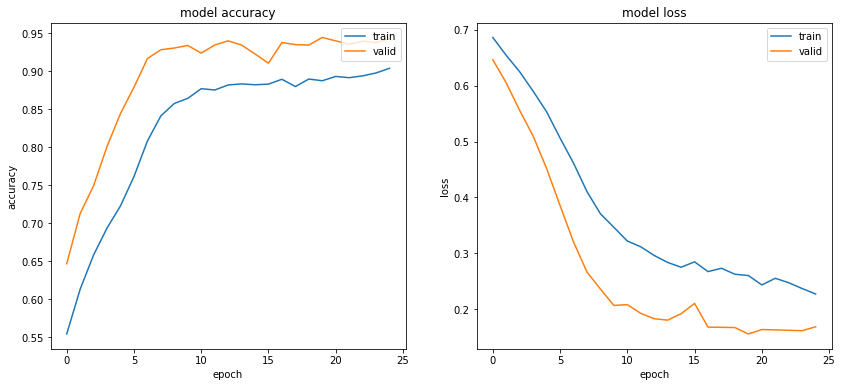

Training Accuracy: 0.9574
Test Accuracy:  0.8767


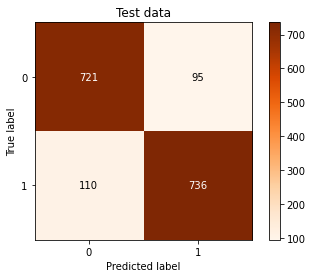

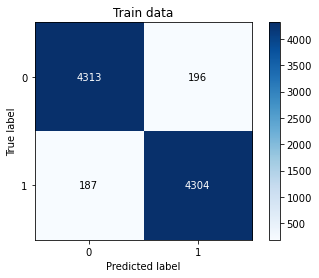

In [111]:
plot_history(history, dme_model, len_list_embed)
loss, accuracy = dme_model.evaluate([X_train]*len_list_embed, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = dme_model.evaluate([X_test]*len_list_embed, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))

In [129]:
y_train, X_train = shuffle(y_train, X_train, random_state=1234)
y_test, X_test = shuffle(y_test, X_test, random_state=1234)

list_embed = [ embedding_matrix_word2vec, 
               embedding_matrix_fasttext, embedding_matrix_glove ]
len_list_embed = len(list_embed)
earlystop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

dme_model = DME(list_embed, maxlen=maxlen)
history = dme_model.fit([X_train]*len_list_embed,
                        y_train, 
                        batch_size=1000, 
                        epochs=200, 
                        verbose=1, 
                        validation_split=0.2,
                        callbacks=[earlystop]
                       )

KerasTensor(type_spec=TensorSpec(shape=(None, 100, 200), dtype=tf.float32, name=None), name='model_107/lambda_36/Sum:0', description="created by layer 'model_107'")
Epoch 1/200
8/8 [==============================] - 16s 1s/step - loss: 0.6911 - accuracy: 0.5138 - val_loss: 0.6817 - val_accuracy: 0.5917
Epoch 2/200
8/8 [==============================] - 9s 1s/step - loss: 0.6728 - accuracy: 0.5697 - val_loss: 0.6468 - val_accuracy: 0.6467
Epoch 3/200
8/8 [==============================] - 9s 1s/step - loss: 0.6519 - accuracy: 0.6001 - val_loss: 0.6161 - val_accuracy: 0.6894
Epoch 4/200
8/8 [==============================] - 9s 1s/step - loss: 0.6315 - accuracy: 0.6297 - val_loss: 0.5958 - val_accuracy: 0.7078
Epoch 5/200
8/8 [==============================] - 9s 1s/step - loss: 0.6049 - accuracy: 0.6699 - val_loss: 0.5686 - val_accuracy: 0.7322
Epoch 6/200
8/8 [==============================] - 9s 1s/step - loss: 0.5912 - accuracy: 0.6892 - val_loss: 0.5339 - val_accuracy: 0.7561
Epoch 

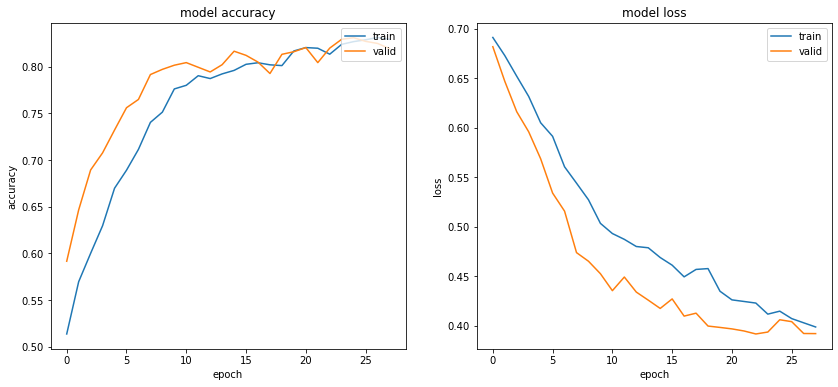

Training Accuracy: 0.8823
Test Accuracy:  0.8394


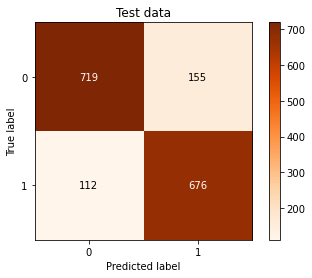

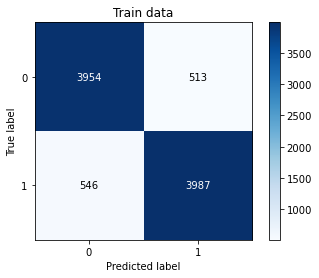

In [130]:
plot_history(history, dme_model, len_list_embed)
loss, accuracy = dme_model.evaluate([X_train]*len_list_embed, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = dme_model.evaluate([X_test]*len_list_embed, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))

In [131]:
list_embed = [ custom_embedding_matrix_ft, custom_embeding_matrix, 
                         custom_embedding_matrix_w2v]
len_list_embed = len(list_embed)

dme_model = DME(list_embed, maxlen=maxlen)
history = dme_model.fit([X_train]*len_list_embed,
                        y_train, 
                        batch_size=1000, 
                        epochs=200, 
                        verbose=1, 
                        validation_split=0.2,
                        callbacks=[earlystop]
                       )

KerasTensor(type_spec=TensorSpec(shape=(None, 100, 200), dtype=tf.float32, name=None), name='model_110/lambda_37/Sum:0', description="created by layer 'model_110'")
Epoch 1/200
8/8 [==============================] - 17s 1s/step - loss: 0.6884 - accuracy: 0.5408 - val_loss: 0.6620 - val_accuracy: 0.6389
Epoch 2/200
8/8 [==============================] - 9s 1s/step - loss: 0.6502 - accuracy: 0.6160 - val_loss: 0.5928 - val_accuracy: 0.7094
Epoch 3/200
8/8 [==============================] - 9s 1s/step - loss: 0.6038 - accuracy: 0.6597 - val_loss: 0.5359 - val_accuracy: 0.7739
Epoch 4/200
8/8 [==============================] - 9s 1s/step - loss: 0.5557 - accuracy: 0.7081 - val_loss: 0.4705 - val_accuracy: 0.8144
Epoch 5/200
8/8 [==============================] - 9s 1s/step - loss: 0.5135 - accuracy: 0.7361 - val_loss: 0.4137 - val_accuracy: 0.8411
Epoch 6/200
8/8 [==============================] - 9s 1s/step - loss: 0.4720 - accuracy: 0.7942 - val_loss: 0.3477 - val_accuracy: 0.8872
Epoch 

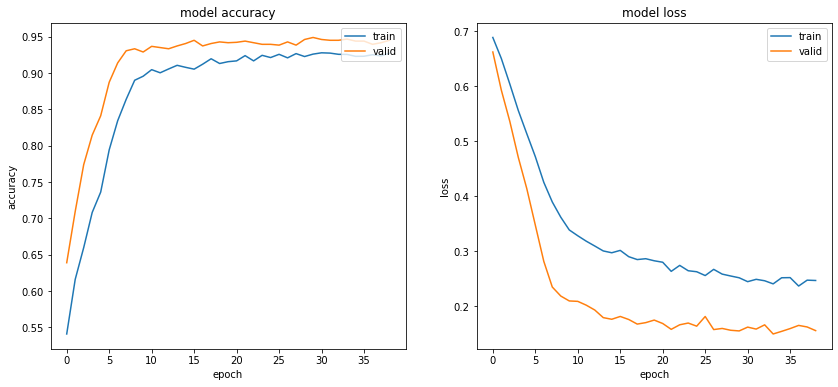

Training Accuracy: 0.9594
Test Accuracy:  0.8748


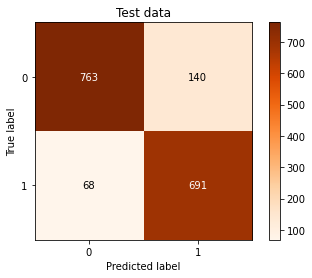

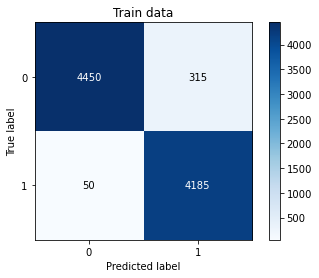

In [132]:
plot_history(history, dme_model, len_list_embed)
loss, accuracy = dme_model.evaluate([X_train]*len_list_embed, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = dme_model.evaluate([X_test]*len_list_embed, y_test, verbose=False)
print("Test Accuracy:  {:.4f}".format(accuracy))

In [66]:
sentences = [nltk.word_tokenize(sentence) for sentence in train['Phrase']]

w2v = Word2Vec(vector_size=300, window=10, min_count=2)
w2v.build_vocab(sentences)
w2v.train(sentences, total_examples=w2v.corpus_count, epochs=30)

embedding_matrix_w2v = np.zeros((vocab_size, 300))


cnt = 0
for word,i in tokenizer.word_index.items():

    try:
        embedding_matrix_w2v[i] = w2v.wv[word]
    except:
        cnt+=1
        
print(cnt)



418


In [67]:

ft = FastText(vector_size=300, window=10, min_count=2)
ft.build_vocab(sentences)
ft.train(sentences, total_examples=ft.corpus_count, epochs=30)

embedding_matrix_ft = np.zeros((vocab_size, 300))


cnt = 0
for word,i in tokenizer.word_index.items():
    
    try:
        embedding_matrix_ft[i] = ft.wv[word]
    except:
        print(word)
        cnt+=1
        
print(cnt)

0


Epoch 1/100
8/8 [==============================] - 13s 630ms/step - loss: 0.6932 - accuracy: 0.4992 - val_loss: 0.6905 - val_accuracy: 0.5350
Epoch 2/100
8/8 [==============================] - 4s 454ms/step - loss: 0.6886 - accuracy: 0.5254 - val_loss: 0.6837 - val_accuracy: 0.5589
Epoch 3/100
8/8 [==============================] - 4s 456ms/step - loss: 0.6838 - accuracy: 0.5308 - val_loss: 0.6771 - val_accuracy: 0.5906
Epoch 4/100
8/8 [==============================] - 4s 438ms/step - loss: 0.6822 - accuracy: 0.5303 - val_loss: 0.6741 - val_accuracy: 0.5939
Epoch 5/100
8/8 [==============================] - 3s 436ms/step - loss: 0.6771 - accuracy: 0.5519 - val_loss: 0.6653 - val_accuracy: 0.6089
Epoch 6/100
8/8 [==============================] - 3s 437ms/step - loss: 0.6718 - accuracy: 0.5600 - val_loss: 0.6568 - val_accuracy: 0.6211
Epoch 7/100
8/8 [==============================] - 3s 429ms/step - loss: 0.6674 - accuracy: 0.5649 - val_loss: 0.6496 - val_accuracy: 0.6267
Epoch 8/100


Epoch 59/100
8/8 [==============================] - 3s 423ms/step - loss: 0.5417 - accuracy: 0.7204 - val_loss: 0.4962 - val_accuracy: 0.7539
Epoch 60/100
8/8 [==============================] - 3s 429ms/step - loss: 0.5303 - accuracy: 0.7310 - val_loss: 0.5075 - val_accuracy: 0.7500
Epoch 61/100
8/8 [==============================] - 3s 433ms/step - loss: 0.5381 - accuracy: 0.7303 - val_loss: 0.4944 - val_accuracy: 0.7511
Epoch 62/100
8/8 [==============================] - 3s 433ms/step - loss: 0.5334 - accuracy: 0.7369 - val_loss: 0.4923 - val_accuracy: 0.7539
Epoch 63/100
8/8 [==============================] - 3s 426ms/step - loss: 0.5386 - accuracy: 0.7222 - val_loss: 0.5023 - val_accuracy: 0.7533
Epoch 64/100
8/8 [==============================] - 3s 434ms/step - loss: 0.5328 - accuracy: 0.7314 - val_loss: 0.4932 - val_accuracy: 0.7572
Epoch 65/100
8/8 [==============================] - 3s 432ms/step - loss: 0.5328 - accuracy: 0.7296 - val_loss: 0.4907 - val_accuracy: 0.7594
Epoch 

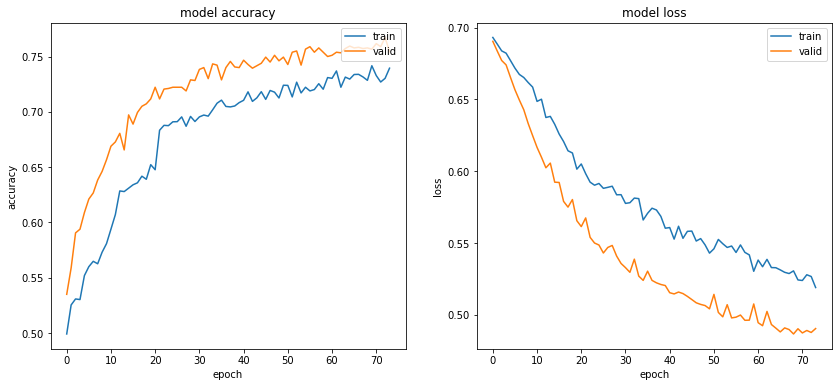

Consider rewriting this model with the Functional API.


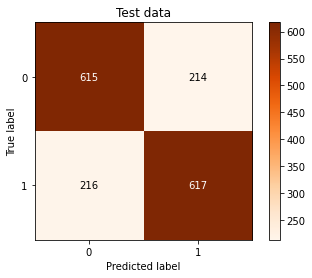

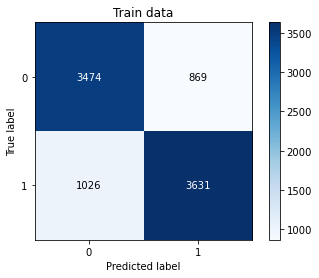

In [149]:
rnn_classifier(custom_embedding_matrix_w2v)
# embedding_matrix_w2v.shape

In [151]:
Testing_Accuracy_custom_w2v = 0.7413

Epoch 1/100
8/8 [==============================] - 12s 599ms/step - loss: 0.6970 - accuracy: 0.4876 - val_loss: 0.6905 - val_accuracy: 0.4922
Epoch 2/100
8/8 [==============================] - 3s 433ms/step - loss: 0.6916 - accuracy: 0.5092 - val_loss: 0.6853 - val_accuracy: 0.5628
Epoch 3/100
8/8 [==============================] - 3s 428ms/step - loss: 0.6873 - accuracy: 0.5228 - val_loss: 0.6790 - val_accuracy: 0.5778
Epoch 4/100
8/8 [==============================] - 3s 437ms/step - loss: 0.6831 - accuracy: 0.5390 - val_loss: 0.6722 - val_accuracy: 0.5900
Epoch 5/100
8/8 [==============================] - 3s 437ms/step - loss: 0.6809 - accuracy: 0.5486 - val_loss: 0.6679 - val_accuracy: 0.5922
Epoch 6/100
8/8 [==============================] - 3s 435ms/step - loss: 0.6769 - accuracy: 0.5607 - val_loss: 0.6625 - val_accuracy: 0.6056
Epoch 7/100
8/8 [==============================] - 3s 425ms/step - loss: 0.6744 - accuracy: 0.5703 - val_loss: 0.6574 - val_accuracy: 0.6111
Epoch 8/100


Epoch 59/100
8/8 [==============================] - 3s 428ms/step - loss: 0.5556 - accuracy: 0.7092 - val_loss: 0.5354 - val_accuracy: 0.7400
Epoch 60/100
8/8 [==============================] - 3s 428ms/step - loss: 0.5589 - accuracy: 0.7132 - val_loss: 0.5342 - val_accuracy: 0.7422
Epoch 61/100
8/8 [==============================] - 3s 432ms/step - loss: 0.5529 - accuracy: 0.7138 - val_loss: 0.5351 - val_accuracy: 0.7361
Epoch 62/100
8/8 [==============================] - 3s 432ms/step - loss: 0.5568 - accuracy: 0.7135 - val_loss: 0.5340 - val_accuracy: 0.7450
Epoch 63/100
8/8 [==============================] - 3s 429ms/step - loss: 0.5512 - accuracy: 0.7201 - val_loss: 0.5386 - val_accuracy: 0.7272
Epoch 64/100
8/8 [==============================] - 3s 425ms/step - loss: 0.5556 - accuracy: 0.7094 - val_loss: 0.5337 - val_accuracy: 0.7356
Epoch 65/100
8/8 [==============================] - 3s 427ms/step - loss: 0.5520 - accuracy: 0.7149 - val_loss: 0.5434 - val_accuracy: 0.7239
Epoch 

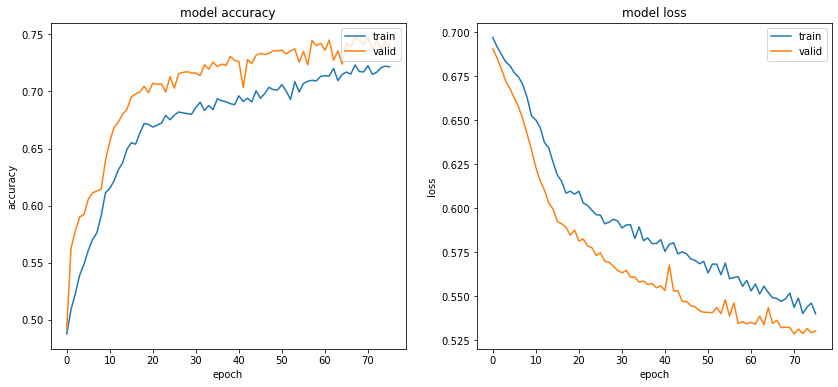

Consider rewriting this model with the Functional API.


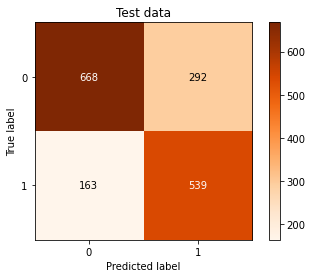

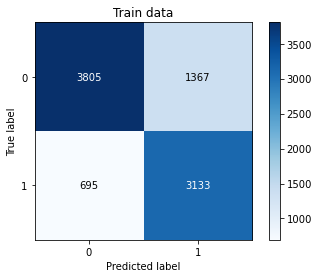

In [150]:
rnn_classifier(custom_embedding_matrix_ft)

In [152]:
Testing_Accuracy_custom_ft = 0.7262

In [157]:
avg_accuracy = (Testing_Accuracy_custom_embed 
+ Test_Accuracy_fasttext_embed 
+ Testing_Accuracy_word2vec_embed
+ Testing_Accuracy_glove_embed 
+ Testing_Accuracy_custom_ft 
+ Testing_Accuracy_custom_w2v )/6

print("Test set average accuracy (0-1 scale) by NOT using Meta-embedding", avg_accuracy)

Test set average accuracy (0-1 scale) by NOT using Meta-embedding 0.7902166666666667


* Keras embedding:
    * Training Accuracy: 0.9496
    * Test Accuracy:  0.8526 
* Pretrained - Fasttext:
    * Training Accuracy: 0.8642
    * Test Accuracy:  0.8177
* Pretrained - Word2vec:
    * Training Accuracy: 0.8452
    * Test Accuracy:  0.7948
* Pretrained - Glove:
    * Training Accuracy: 0.8458
    * Test Accuracy:  0.8099
* Word2Vec - gensim:
    * Training Accuracy: 0.7709
    * Test Accuracy:  0.7262
* Fasttext - gensim:
    * Training Accuracy: 0.7894
    * Test Accuracy:  0.7413
    
#### DME (dynamic meta embedding):
* Using Keras embedding, Pretrained - Fasttext, Pretrained - Word2vec, Pretrained - Glove, Word2Vec - gensim and Fasttext - gensim
    * Training Accuracy: 0.9567
    * Test Accuracy:  0.8785        
* Using Keras embedding, Pretrained - Fasttext, Pretrained - Word2vec, Pretrained - Glove
    * Training Accuracy: 0.9644
    * Test Accuracy:  0.8670    
* Using Pretrained - Fasttext, Pretrained - Word2vec, Pretrained - Glove
    * Training Accuracy: 0.8922
    * Test Accuracy:  0.8381
* Using Keras embedding, Word2Vec - gensim and Fasttext - gensim
    * Training Accuracy: 0.9567
    * Test Accuracy:  0.8755     
    
#### DME (dynamic meta embedding) - Unweighted:
* Using Keras embedding, Pretrained - Fasttext, Pretrained - Word2vec, Pretrained - Glove, Word2Vec - gensim and Fasttext - gensim
    * Training Accuracy: 0.9574
    * Test Accuracy:  0.8767       
* Using Keras embedding, Pretrained - Fasttext, Pretrained - Word2vec, Pretrained - Glove
    * Training Accuracy: 0.9644
    * Test Accuracy:  0.8706   
* Using Pretrained - Fasttext, Pretrained - Word2vec, Pretrained - Glove
    * Training Accuracy: 0.8823
    * Test Accuracy:  0.8394
* Using Keras embedding, Word2Vec - gensim and Fasttext - gensim
    * Training Accuracy: 0.9594
    * Test Accuracy:  0.8748    